In [69]:
import time
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,roc_curve,roc_auc_score,classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,IsolationForest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_score,cross_val_predict

In [70]:
data=pd.read_csv("C:/Users/MY PC/Downloads/Bank_Dataset for Case Study/Dataset/loan_dataset.csv")

In [71]:
data.head()

,Column1,ID,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,0,10001,110001,23,4,Under Graduate,1,392000,0,0,1,0,0
1,1,10002,110014,43,3,Under Graduate,19,272000,0,0,1,0,0
2,2,10003,110014,37,1,Under Graduate,15,88000,0,0,0,0,0
3,3,10004,110003,33,1,Graduate,9,800000,0,0,0,0,0
4,4,10005,110004,33,4,Graduate,8,360000,0,0,0,0,0


### Creating a new feature ratio which contains ratio of positive responce corrosponding to pincode

In [72]:
def ratio(data):
    rati={}
    for i in data["Pin-code"].unique():
        tot1=len(data.loc[(data["Pin-code"]==i) & (data["Loan"]==1)])
        tot0=len(data.loc[(data["Pin-code"]==i)&(data["Loan"]==0)])
        r=tot1/(tot0+tot1)
        rati.update({i:r})
    return rati

In [73]:
def fun(data,rati):
    return rati.get(data)


In [74]:
data["positive_ratio"]=data["Pin-code"].apply(fun,rati=ratio(data))

In [75]:
data.head()

,Column1,ID,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan,positive_ratio
0,0,10001,110001,23,4,Under Graduate,1,392000,0,0,1,0,0,0.085211
1,1,10002,110014,43,3,Under Graduate,19,272000,0,0,1,0,0,0.088979
2,2,10003,110014,37,1,Under Graduate,15,88000,0,0,0,0,0,0.088979
3,3,10004,110003,33,1,Graduate,9,800000,0,0,0,0,0,0.097436
4,4,10005,110004,33,4,Graduate,8,360000,0,0,0,0,0,0.104492


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Column1         5000 non-null   int64  
 1   ID              5000 non-null   int64  
 2   Pin-code        5000 non-null   int64  
 3   age             5000 non-null   int64  
 4   Fam members     5000 non-null   int64  
 5   Education       5000 non-null   object 
 6   T.Experience    5000 non-null   int64  
 7   Income          5000 non-null   int64  
 8   Mortgage        5000 non-null   int64  
 9   Fixed Deposit   5000 non-null   int64  
 10  Demat           5000 non-null   int64  
 11  Net Banking     5000 non-null   int64  
 12  Loan            5000 non-null   int64  
 13  positive_ratio  5000 non-null   float64
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


In [77]:
data.isna().sum()

Column1           0
ID                0
Pin-code          0
age               0
Fam members       0
Education         0
T.Experience      0
Income            0
Mortgage          0
Fixed Deposit     0
Demat             0
Net Banking       0
Loan              0
positive_ratio    0
dtype: int64

### We can see that above data does not contains any missing value

### Droping unwanted columns

In [78]:
X=data.drop(["Column1","ID","Loan","Pin-code"],axis=1)

In [79]:
X.head()

,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,positive_ratio
0,23,4,Under Graduate,1,392000,0,0,1,0,0.085211
1,43,3,Under Graduate,19,272000,0,0,1,0,0.088979
2,37,1,Under Graduate,15,88000,0,0,0,0,0.088979
3,33,1,Graduate,9,800000,0,0,0,0,0.097436
4,33,4,Graduate,8,360000,0,0,0,0,0.104492


### Encoading data

In [80]:
def Onehotencoding(newdata):
    for col in newdata.dtypes[newdata.dtypes=='object'].index:
        dummie=newdata.pop(col)
        newdata=pd.concat([newdata,pd.get_dummies(dummie,prefix=[col],dtype=int)],axis=1)
    return newdata

### One Hot Encoding

In [81]:
X=Onehotencoding(X)

In [82]:
X.head()

,age,Fam members,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,positive_ratio,['Education']_Graduate,['Education']_Post Graduate,['Education']_Under Graduate
0,23,4,1,392000,0,0,1,0,0.085211,0,0,1
1,43,3,19,272000,0,0,1,0,0.088979,0,0,1
2,37,1,15,88000,0,0,0,0,0.088979,0,0,1
3,33,1,9,800000,0,0,0,0,0.097436,1,0,0
4,33,4,8,360000,0,0,0,0,0.104492,1,0,0


In [83]:
Y=data["Loan"]

In [84]:
name={"['Education']_Graduate":"Graduate","['Education']_Post Graduate":"Post Graduate","['Education']_Under Graduate":"Under Graduate"}

In [85]:
X.rename(columns=name,inplace=True)

## Exploring Data

In [86]:
X.nunique()

age                45
Fam members         4
T.Experience       47
Income            162
Mortgage          347
Fixed Deposit       2
Demat               2
Net Banking         2
positive_ratio      5
Graduate            2
Post Graduate       2
Under Graduate      2
dtype: int64

In [87]:
X.describe()

,age,Fam members,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,positive_ratio,Graduate,Post Graduate,Under Graduate
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.338400,2.396400,20.104600,5.901936e+05,4.519904e+05,0.06040,0.104400,0.596800,0.096000,0.280600,0.300200,0.419200
std,11.463166,1.147663,11.467954,3.682698e+05,8.137104e+05,0.23825,0.305809,0.490589,0.007822,0.449337,0.458391,0.493478
min,21.000000,1.000000,-3.000000,6.400000e+04,0.000000e+00,0.00000,0.000000,0.000000,0.085211,0.000000,0.000000,0.000000
25%,33.000000,1.000000,10.000000,3.120000e+05,0.000000e+00,0.00000,0.000000,0.000000,0.088979,0.000000,0.000000,0.000000
50%,43.000000,2.000000,20.000000,5.120000e+05,0.000000e+00,0.00000,0.000000,1.000000,0.097436,0.000000,0.000000,0.000000
75%,53.000000,3.000000,30.000000,7.840000e+05,8.080000e+05,0.00000,0.000000,1.000000,0.103935,1.000000,1.000000,1.000000
max,65.000000,4.000000,43.000000,1.792000e+06,5.080000e+06,1.00000,1.000000,1.000000,0.104492,1.000000,1.000000,1.000000


### Correlation

In [88]:
correlation=pd.concat([X,Y],axis=1).corr()["Loan"].sort_values(ascending=False)

In [89]:
correlation

Loan              1.000000
Income            0.502462
Fixed Deposit     0.316355
Mortgage          0.142095
Post Graduate     0.090212
Graduate          0.071491
Fam members       0.061367
positive_ratio    0.026550
Demat             0.021954
Net Banking       0.006278
T.Experience     -0.007413
age              -0.007726
Under Graduate   -0.148894
Name: Loan, dtype: float64

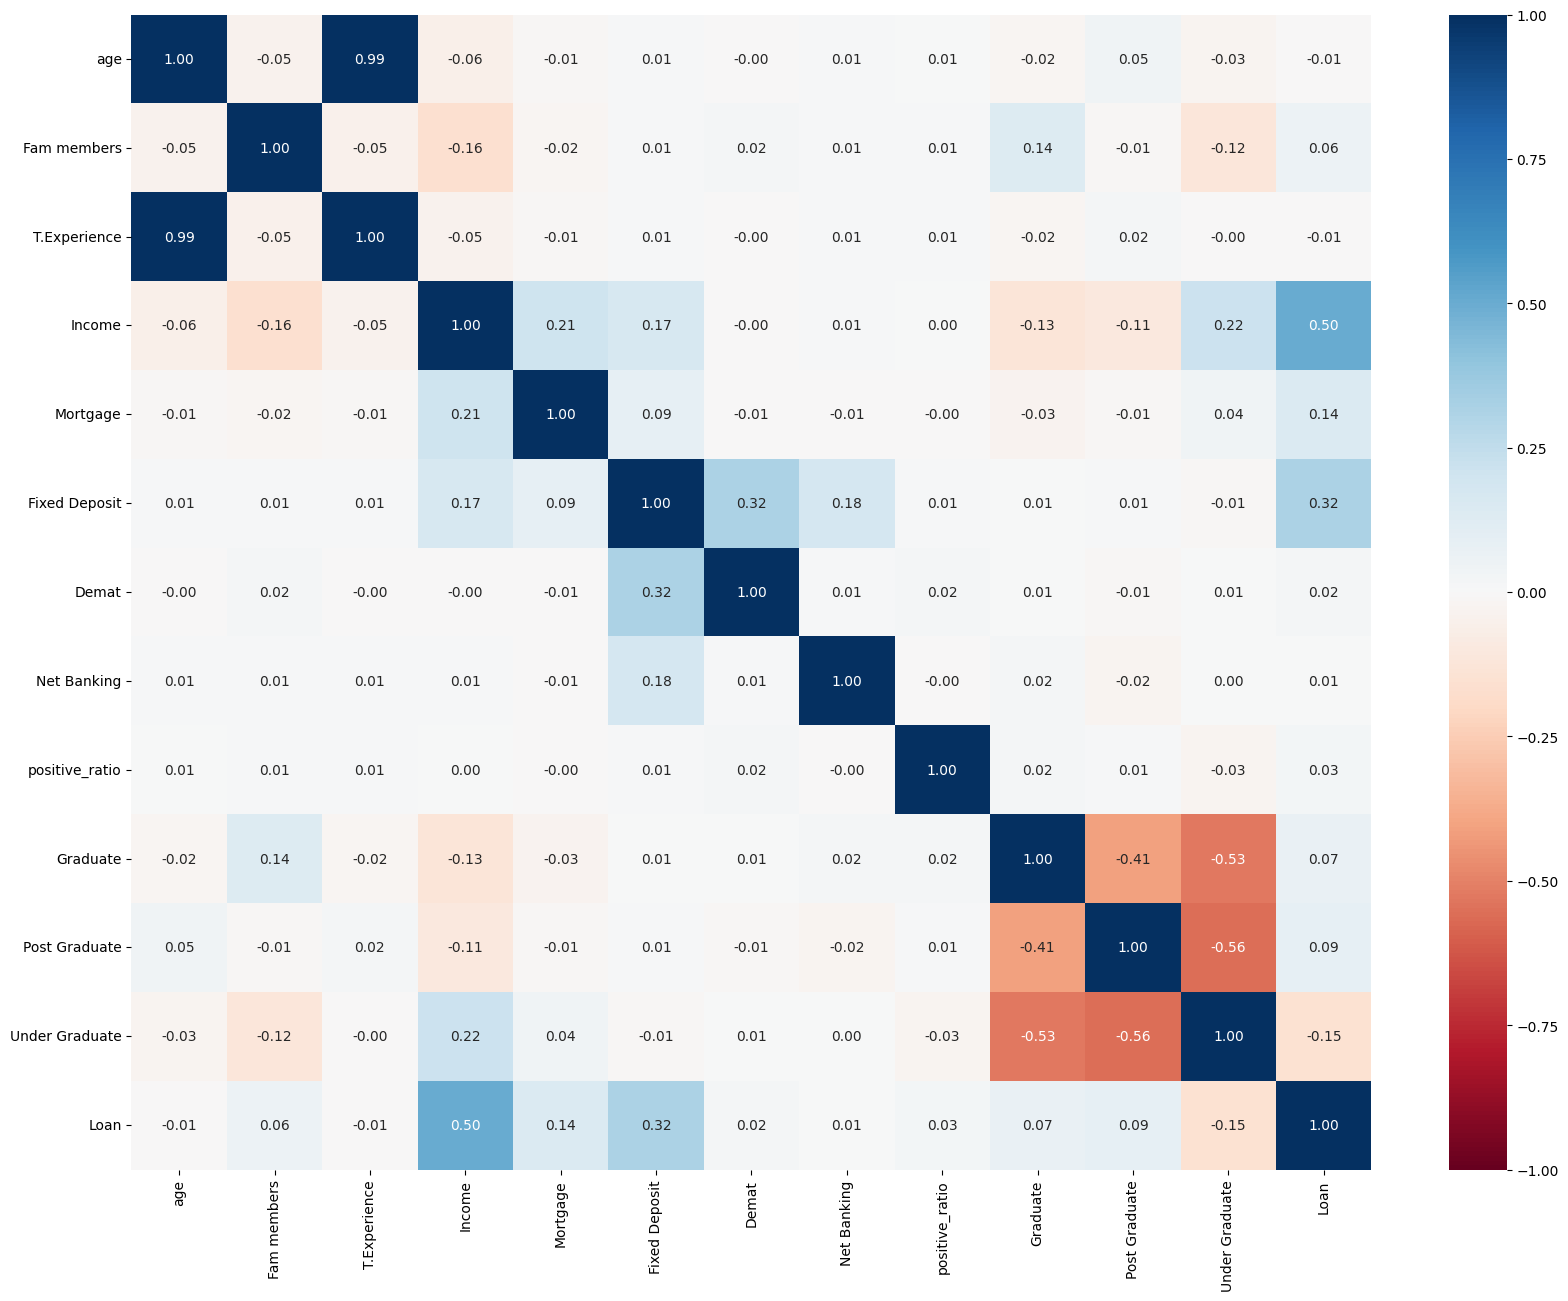

In [90]:
plt.figure(figsize=[20,15])
sns.heatmap(pd.concat([X,Y],axis=1).corr(),cmap="RdBu",annot=True,fmt="0.2f",vmax=1,vmin=-1)
plt.show()

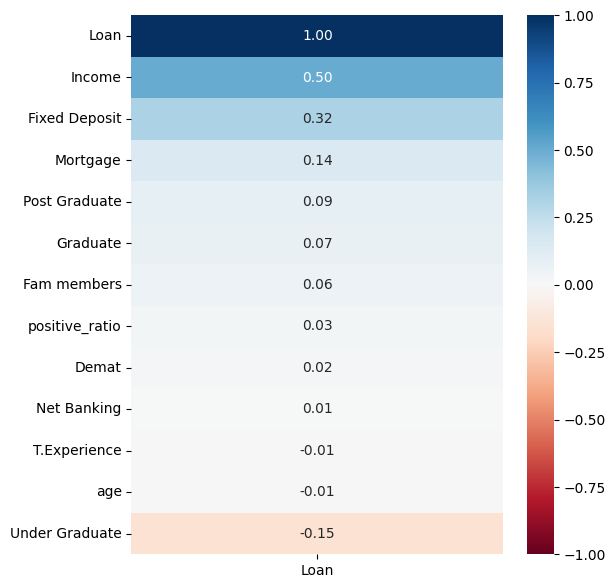

In [91]:
plt.figure(figsize=[6,7])
sns.heatmap(pd.concat([X,Y],axis=1).corr()[["Loan"]].sort_values(by="Loan",ascending=False),
            cmap="RdBu",annot=True,fmt="0.2f",vmax=1,vmin=-1)
plt.show()

### We can see that Income is highly correlated followed by Mortagage,Fixed Deposit and Education_Type

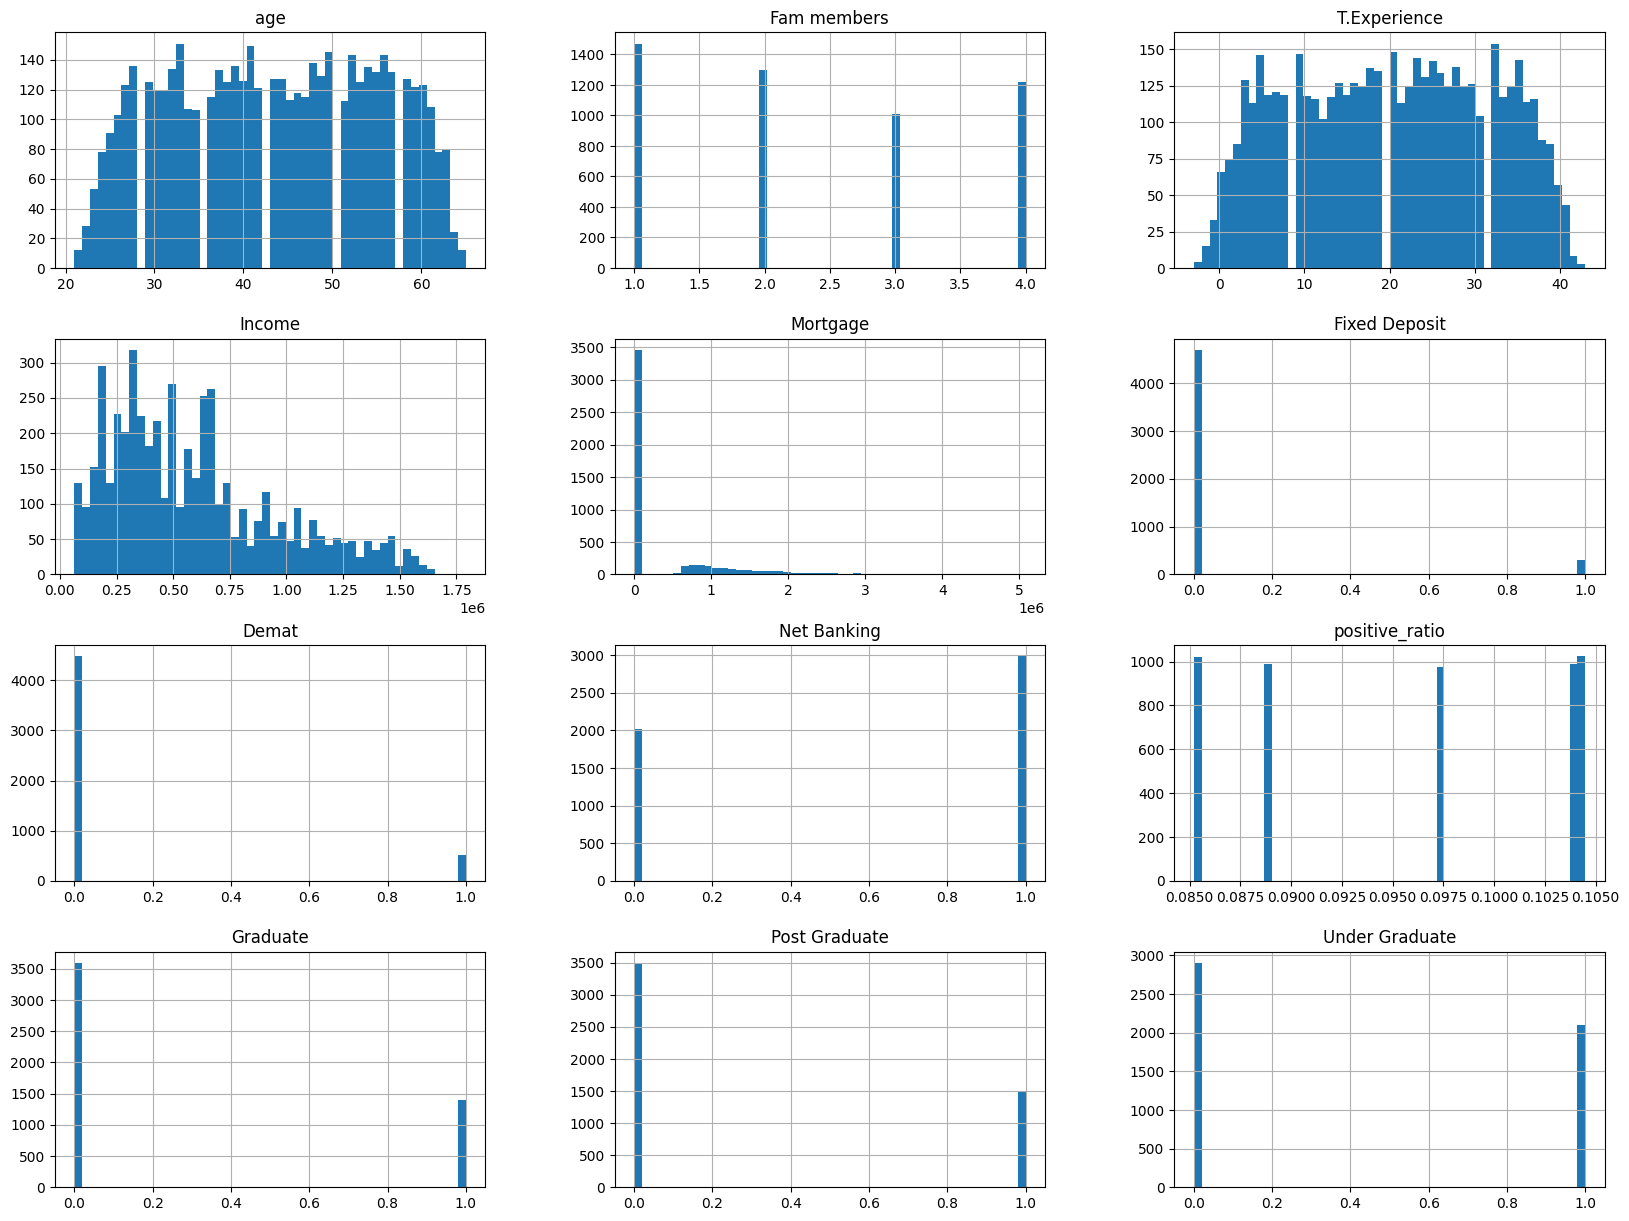

In [92]:
X.hist(bins=50,figsize=[20,15])
plt.show()

In [93]:
X[["Income","Mortgage","age","T.Experience"]].skew().sort_values(ascending=False)

Mortgage        2.104002
Income          0.841339
T.Experience   -0.026325
age            -0.029341
dtype: float64

In [94]:
def group_plt(data,col):
    data=data.groupby([col,'Loan']).size().unstack(fill_value=0)
    return data

In [95]:
def plot_bar_0_1(datafun,col):
    for i in col:
        data3 = group_plt(datafun,i)

        ax=data3.plot(kind='bar', stacked=False,figsize=[10,5])

        for p in ax.patches:
            # Calculate the height of the bar
            height = p.get_height()
            # Annotate the count value on top of the bar
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', fontsize=9, color='black', xytext=(0,5),
                        textcoords='offset points')

In [96]:
datafun=pd.concat([X,Y],axis=1)

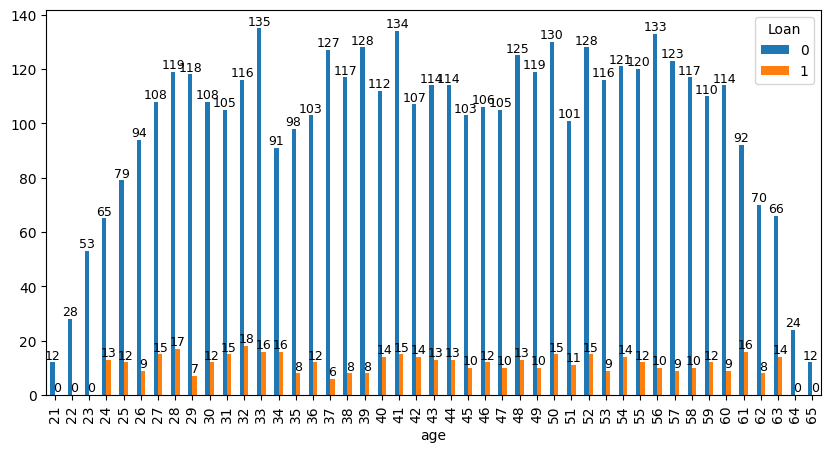

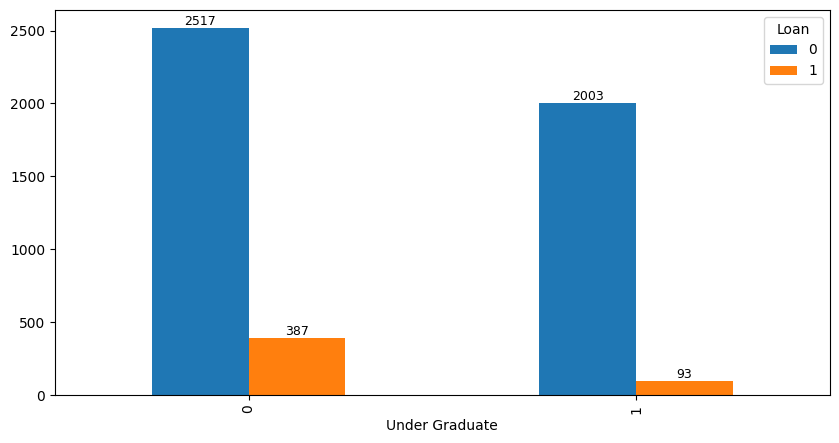

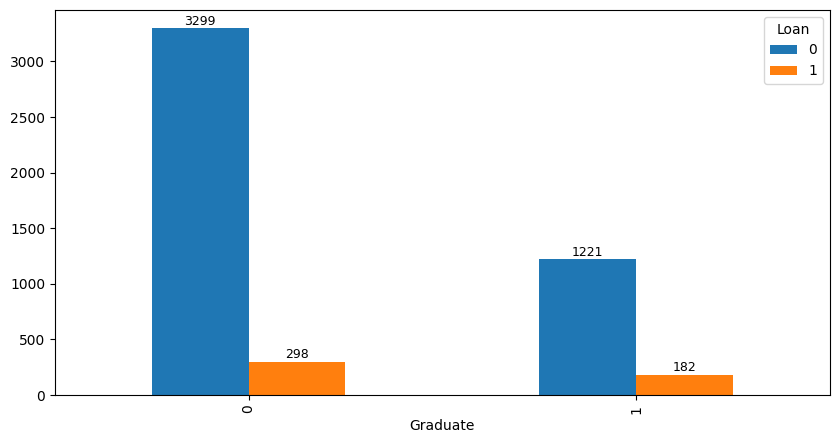

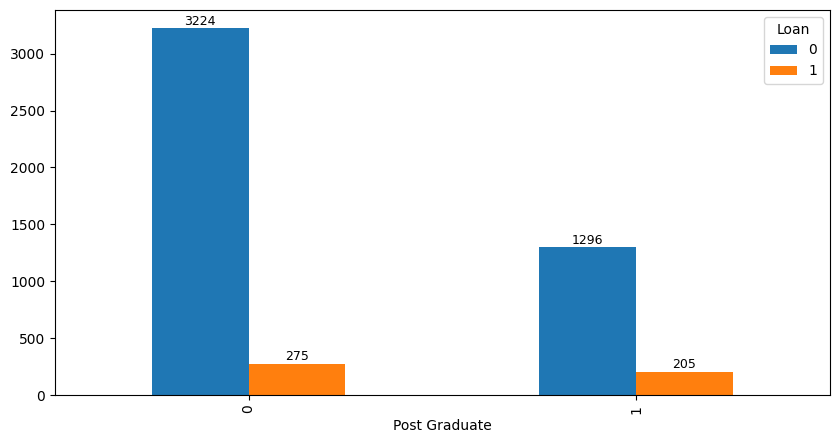

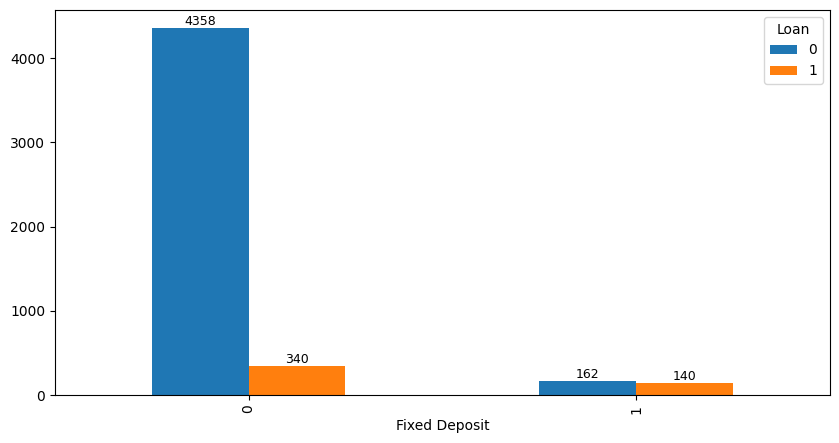

In [97]:
plot_bar_0_1(datafun,["age","Under Graduate","Graduate","Post Graduate","Fixed Deposit"])

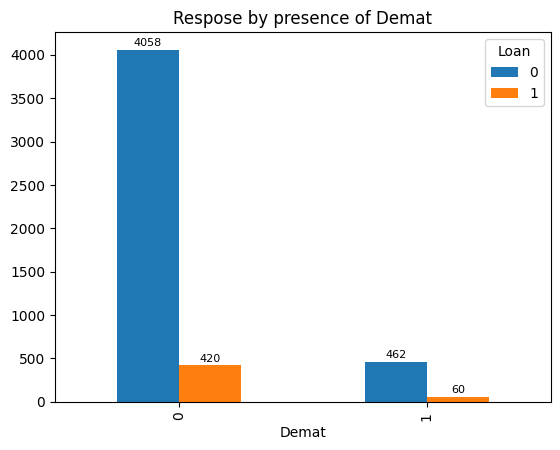

In [98]:
data5=group_plt(data,"Demat")
ax=data5.plot(kind="bar",stacked=False)
plt.title("Respose by presence of Demat")

for p in ax.patches:
    # Calculate the height of the bar
    height = p.get_height()
    # Annotate the count value on top of the bar
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=8, color='black', xytext=(0,5),
                textcoords='offset points')


### Scaling Data

In [99]:
scaler=StandardScaler()

In [100]:
X=scaler.fit_transform(X)

### Spliting Data

In [101]:
def split(X,Y,split_per,random):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=split_per,random_state=random)
    return x_train,x_test,y_train,y_test

In [102]:
def train_test_shape(x_train,x_test,y_train,y_test):
    print("x_train shape: ",x_train.shape)
    print("x_test shape: ",x_test.shape)
    print("y_train shape: ",y_train.shape)
    print("y_test shape: ",y_test.shape)

In [103]:
x_train,x_test,y_train,y_test=split(X,Y,0.20,2)

In [104]:
train_test_shape(x_train,x_test,y_train,y_test)

x_train shape:  (4000, 12)
x_test shape:  (1000, 12)
y_train shape:  (4000,)
y_test shape:  (1000,)


In [105]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Loan, dtype: int64

### Training model

In [106]:
model_param={
    
    RandomForestClassifier():
        [
             {'max_depth':[5,7,9],'n_estimators': [10,30,100,200], 'max_features': [2, 4, 6, 8]},
             {'n_estimators': [10,100], 'max_features': [2, 3, 4]},
             {'max_depth':[6,8,10],'n_estimators': [10, 30,100,200], 'max_features': [2, 4, 6, 8]}
        ],
    
    GradientBoostingClassifier():
        [
            {'learning_rate':[0.1,0.05,0.01,0.001],"n_estimators":[30,50,100,200,300],"criterion":["squared_error"]},
            {'learning_rate':[0.9,0.05,0.09,0.009],"n_estimators":[50,100,200,300]}
        ],
    
    BaggingClassifier():
        [
            {"n_estimators":[30,50,100,200,300],"max_features":[8,9,10,11,12]},
            {"n_estimators":[50,100,200,300]}
        ],
    LogisticRegression():
        [
            {"max_iter":[100,200,300,700,800,1000]}
        ]
}

In [107]:
dict_metric={"Metirces":["Precision","Recall"]}
dict_best={}

In [108]:
start=time.time()
for key,value in model_param.items():
    models=RandomizedSearchCV(estimator=key,param_distributions=value,cv=5)
    models.fit(x_train,y_train)
    dict_metric.update({key:[precision_score(y_test,models.predict(x_test)),recall_score(y_test,models.predict(x_test))]})
    dict_best.update({key:models.best_params_})
end=time.time()
print((end-start))

C:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


111.56784462928772


### Printing the result of all models

In [109]:
pd.DataFrame(dict_metric).head()

,Metirces,RandomForestClassifier(),GradientBoostingClassifier(),BaggingClassifier(),LogisticRegression()
0,Precision,0.959459,0.972973,0.986486,0.870968
1,Recall,0.780220,0.791209,0.802198,0.593407


### Printing every models best perameter

In [110]:
pd.DataFrame(dict_best)

,RandomForestClassifier(),GradientBoostingClassifier(),BaggingClassifier(),LogisticRegression()
n_estimators,10.0,200,50.0,NaN
max_features,6.0,NaN,10.0,NaN
max_depth,8.0,NaN,NaN,NaN
learning_rate,NaN,0.05,NaN,NaN
criterion,NaN,squared_error,NaN,NaN
max_iter,NaN,NaN,NaN,100.0


### Training best model

In [111]:
classimodel=BaggingClassifier(n_estimators=300,max_features=12)

In [112]:
classimodel.fit(x_train,y_train)

BaggingClassifier(max_features=12, n_estimators=300)

### Printing the result of the best model

In [113]:
Train_pred=classimodel.predict(x_train)
Test_pred=classimodel.predict(x_test)
print("Classification Report for Train Data:\n",classification_report(y_train,Train_pred))
print("\nClassification Report for Test Data:\n",classification_report(y_test,Test_pred))

Classification Report for Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3611
           1       1.00      1.00      1.00       389

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       909
           1       0.97      0.81      0.89        91

    accuracy                           0.98      1000
   macro avg       0.98      0.91      0.94      1000
weighted avg       0.98      0.98      0.98      1000



In [114]:
print(accuracy_score(y_test,Test_pred))

0.981


### Printing PR Curve

In [115]:
y_predict=cross_val_predict(BaggingClassifier(n_estimators=300),x_train,y_train,cv=3,method="predict_proba")

In [116]:
y_predict=y_predict[:,1]

In [117]:
preci,reca,thres=precision_recall_curve(y_train,y_predict)

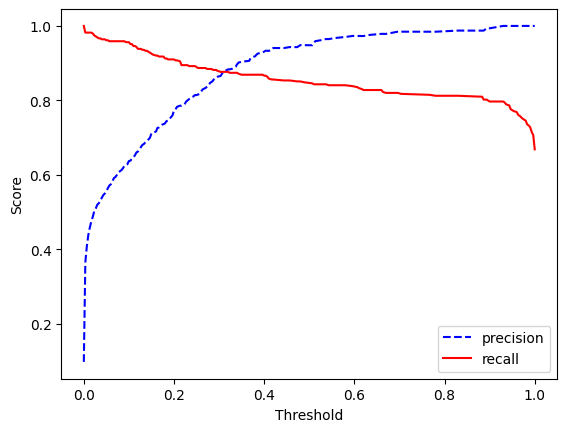

In [118]:
plt.plot(thres,preci[:-1],"b--",label="precision")
plt.plot(thres,reca[:-1],"r",label="recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

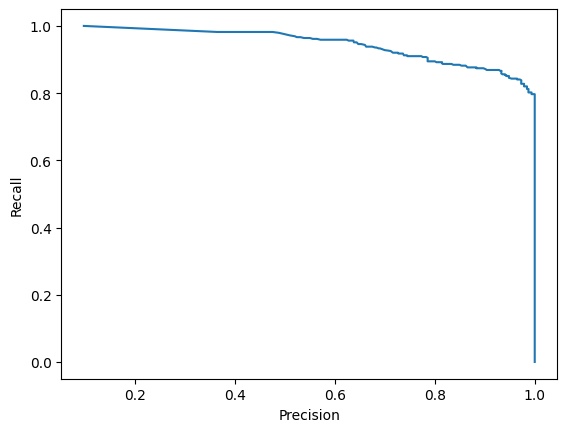

In [119]:
plt.plot(preci,reca)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.show()

### Printing ROC Curve

In [120]:
fpr,tpr,thres=roc_curve(y_train,y_predict)

Text(0, 0.5, 'True Positive Rate')

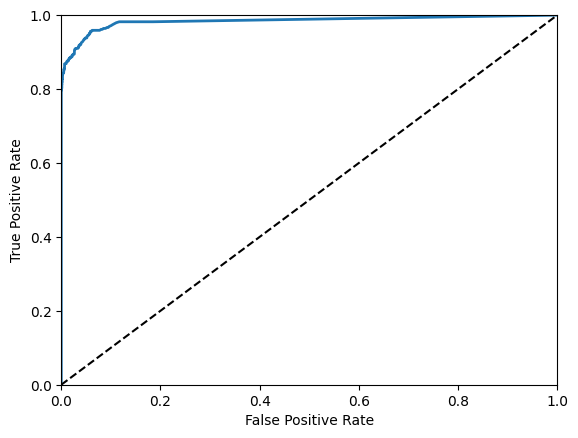

In [121]:
 plt.plot(fpr, tpr, linewidth=2)
 plt.plot([0, 1], [0, 1], 'k--')
 plt.axis([0, 1, 0, 1])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')

### Printing ROC AUC Score

In [122]:
roc_auc_score(y_train,y_predict)

0.9837165644250395

## Predicting real value

In [123]:
dataset=[X[1],X[9],X[16],X[15],X[200],X[4000],X[4980]]

In [124]:
l=[]
for i in dataset:
    print(classimodel.predict(i.reshape(1,-1))[0])

0
1
1
0
0
1
1


In [125]:
Label=[Y[1],Y[9],Y[16],Y[15],Y[200],Y[4000],Y[4980]]

In [126]:
print("Acutal Label:\n",Label)

Acutal Label:
 [0, 1, 1, 0, 0, 1, 1]
